# Safe Neighbourhoods Data Analysis

## Dataset Overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/wnr/Documents/umbc/is428/data/Baltimore911.csv')

print(f"Total number of rows: \033[92m{data.shape[0]}\033[0m")
print(f"Total number of columns: \033[92m{data.shape[1]}\033[0m")

for c in data.columns:
    print(f"\n\033[91mColumn: {c}\033[0m")
    
    dtype = data[c].dtype
    print(f"Data type: \033[92m{dtype}\033[0m")
    
    if pd.api.types.is_numeric_dtype(data[c]):
        print("Type of attribute: Numeric/Real/Continuous")
        print(f"Min: \033[92m{data[c].min()}\033[0m")
        print(f"Max: \033[92m{data[c].max()}\033[0m")
        print(f"Mean: \033[92m{data[c].mean()}\033[0m")
        print(f"Median: \033[92m{data[c].median()}\033[0m")
        print(f"Standard Deviation: \033[92m{data[c].std()}\033[0m")
    elif pd.api.types.is_object_dtype(data[c]):
        print("Type of attribute: Symbolic/Discrete")
        print(f"Number of unique values: \033[92m{data[c].nunique()}\033[0m")
        print("Three attribute values with the largest count:")
        print(f"\033[92m{data[c].value_counts().nlargest(3)}\033[0m")
    elif pd.api.types.is_datetime64_any_dtype(data[c]):
        print("Type of attribute: Temporal")
    elif pd.api.types.is_timedelta64_dtype(data[c]):
        print("Type of attribute: Temporal")
    
    missing_percentage = (data[c].isna().sum() / data.shape[0]) * 100
    print(f"Missingness: \033[92m{missing_percentage:.2f}%\033[0m")


## Overall Crime Temporal Analysis

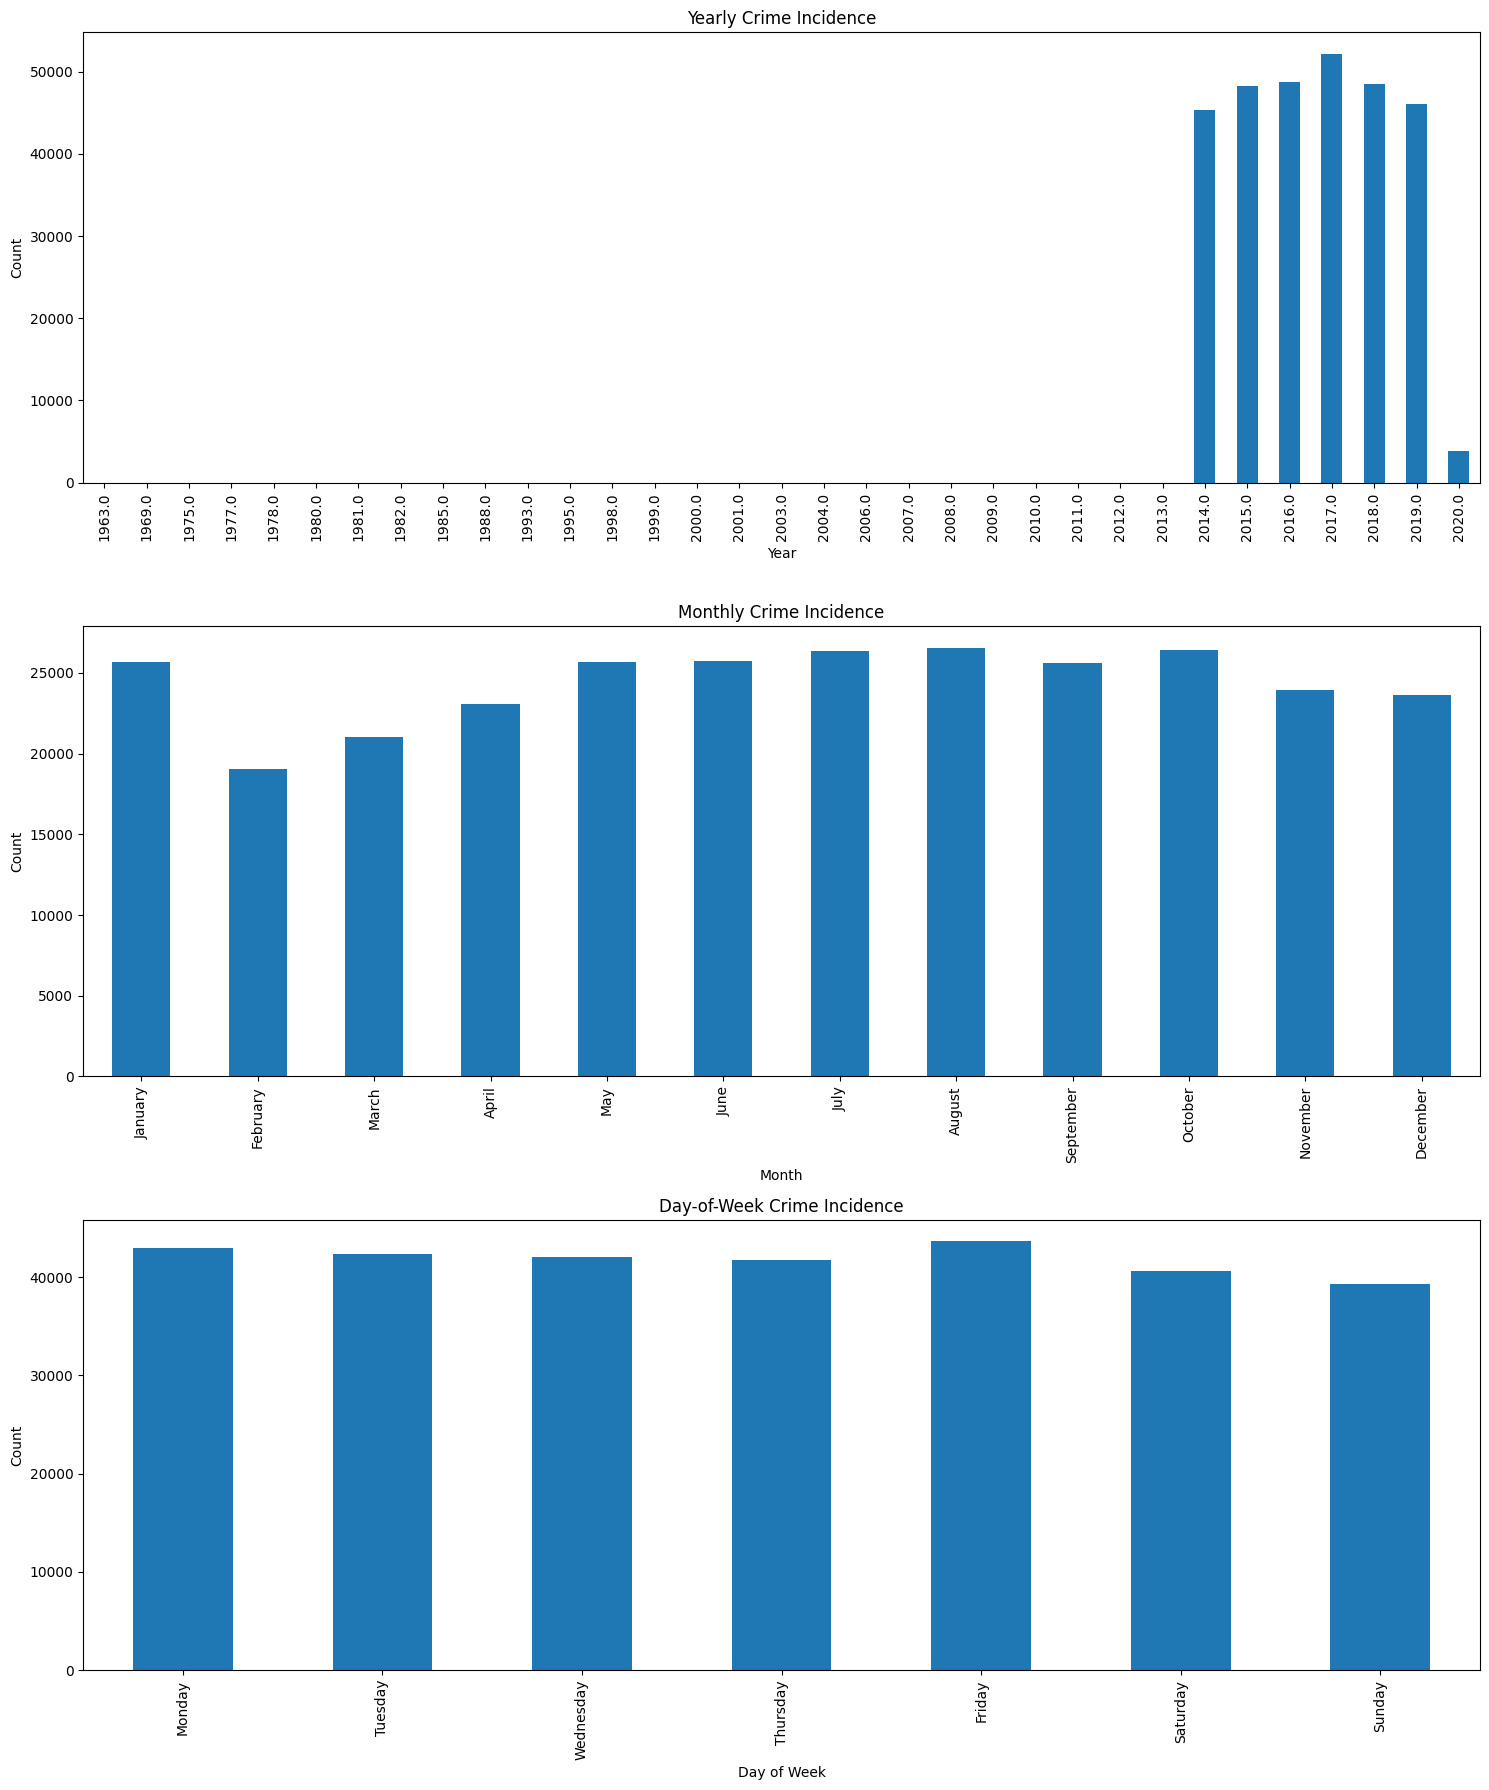

In [11]:
data['CrimeDate_CrimeTime'] = pd.to_datetime(data['CrimeDate'] + ' ' + data['CrimeTime'], format='%m/%d/%Y %H:%M:%S')

data['Year'] = data['CrimeDate_CrimeTime'].dt.year
data['Month'] = data['CrimeDate_CrimeTime'].dt.strftime('%B')
data['DayOfWeek'] = data['CrimeDate_CrimeTime'].dt.day_name()

fig, ax = plt.subplots(3, 1, figsize=(15, 18))

data['Year'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Yearly Crime Incidence')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

data['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', ax=ax[1])
ax[1].set_title('Monthly Crime Incidence')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')

data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=ax[2])
ax[2].set_title('Day-of-Week Crime Incidence')
ax[2].set_xlabel('Day of Week')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Crime Type by Geolocation and Time Period

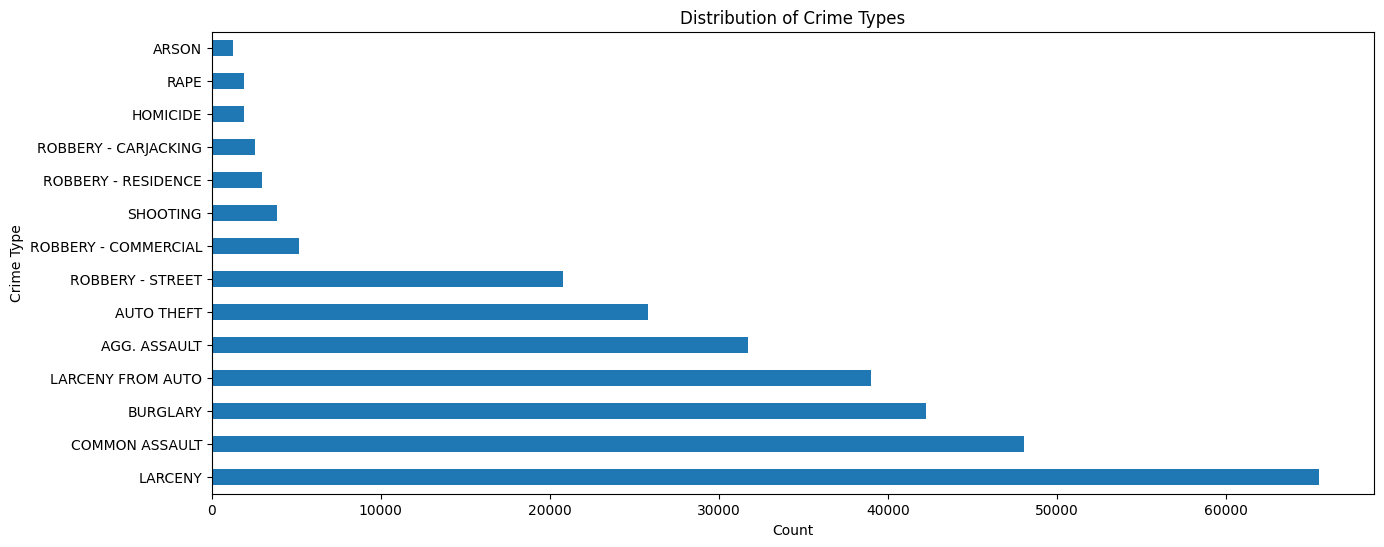

In [14]:
plt.figure(figsize=(15, 6))
data['Description'].value_counts().plot(kind='barh')
plt.title('Distribution of Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

## Crime Type Variance

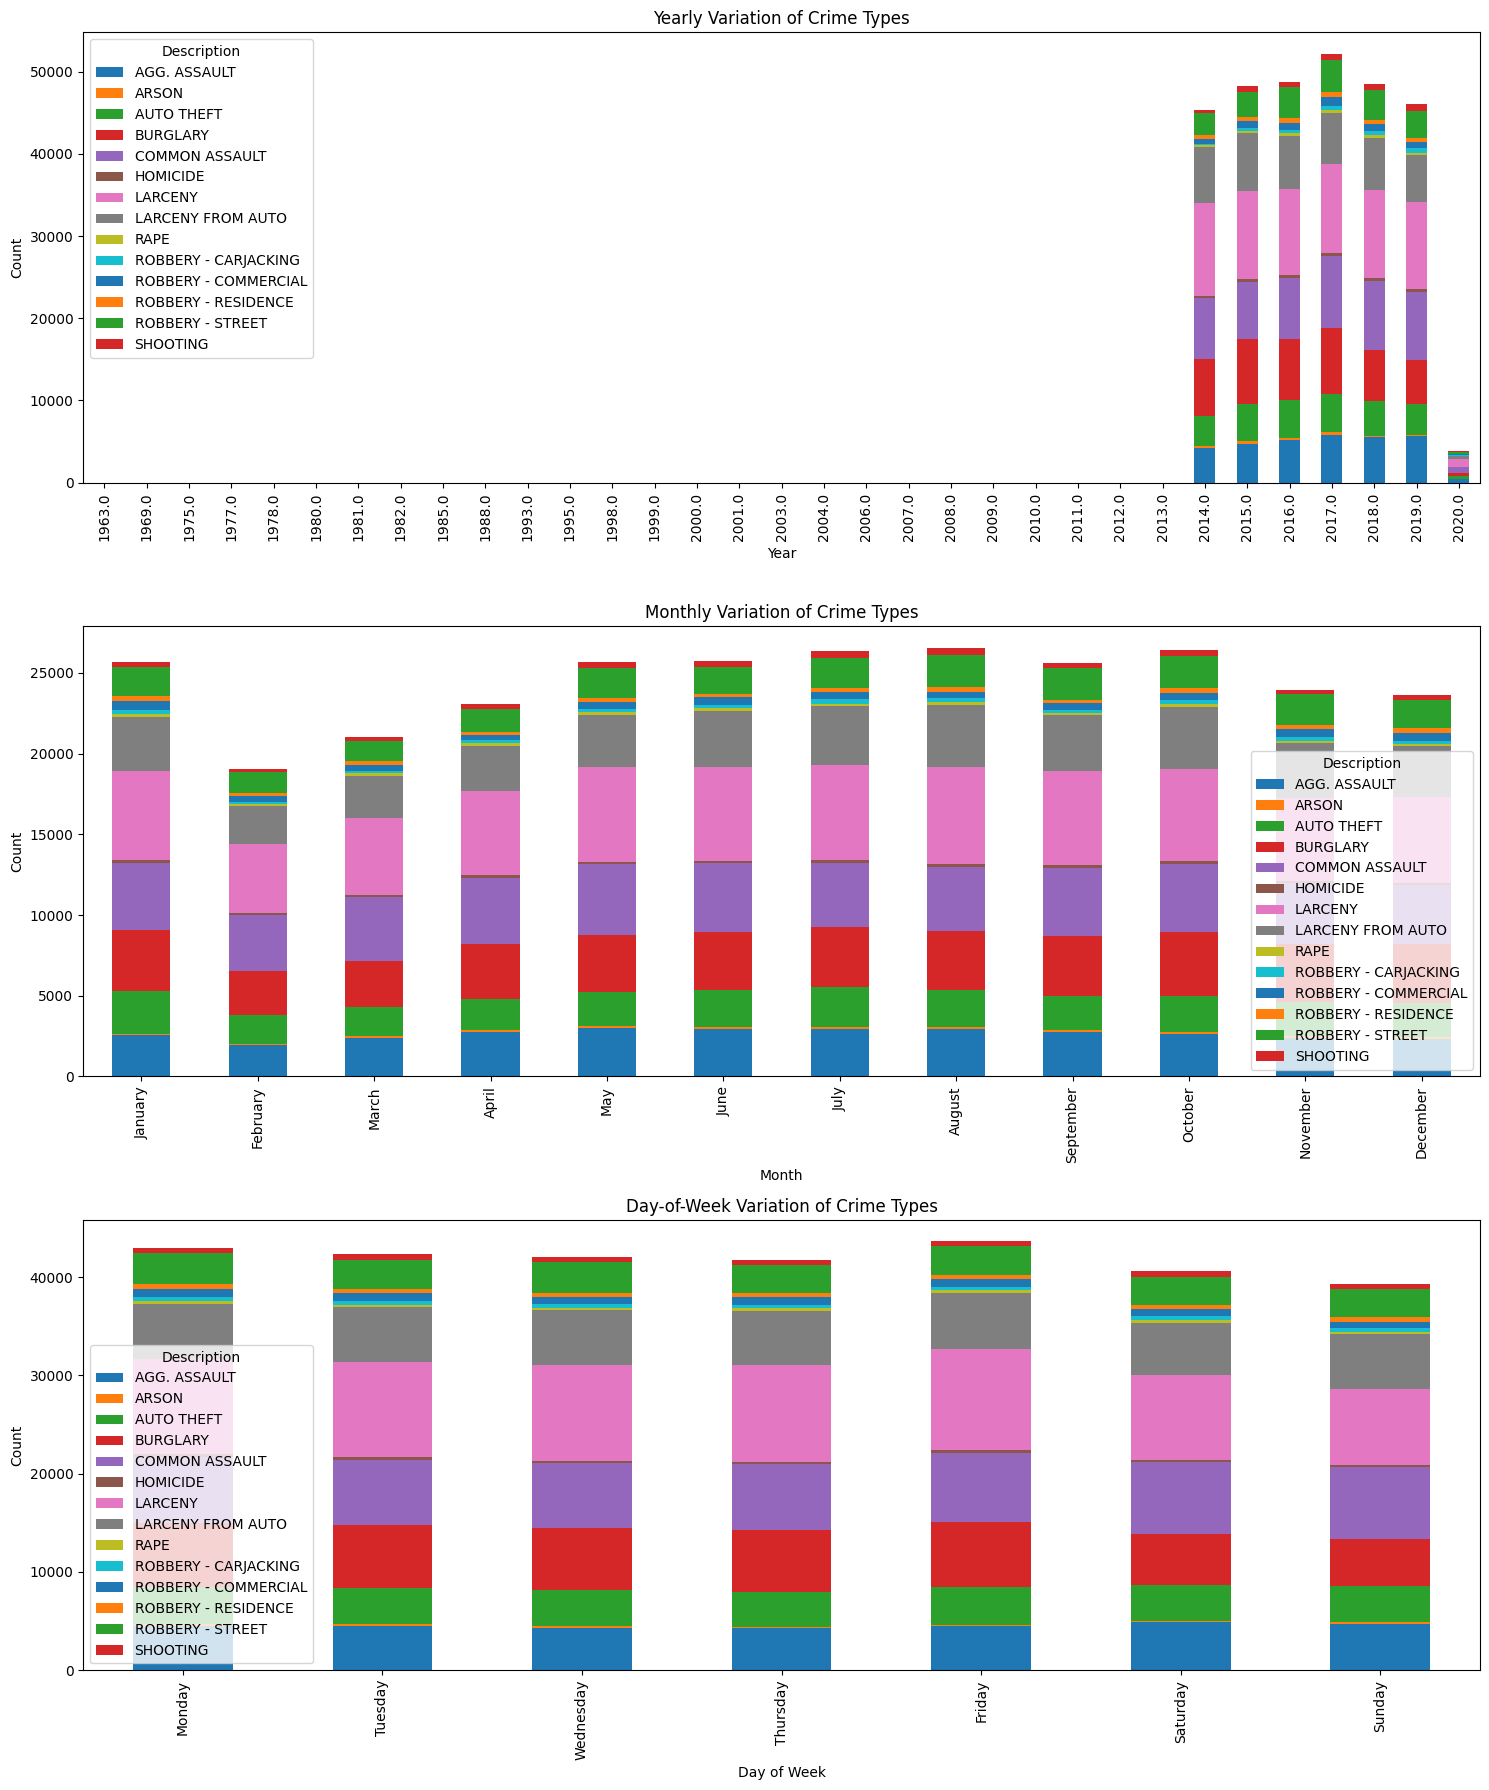

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

data.groupby(['Year', 'Description']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Yearly Variation of Crime Types')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

data.groupby(['Month', 'Description']).size().unstack().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Monthly Variation of Crime Types')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')

data.groupby(['DayOfWeek', 'Description']).size().unstack().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', stacked=True, ax=ax[2])
ax[2].set_title('Day-of-Week Variation of Crime Types')
ax[2].set_xlabel('Day of Week')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()